**420-A52-SF - Algorithmes d'apprentissage supervisé - Hiver 2021 - Spécialisation technique en Intelligence Artificielle**<br/>
MIT License - Copyright (c) 2021 Mikaël Swawola
<br/>
![Travaux Pratiques - Régularisation](static/13-tp-banner.png)
<br/>
**Objectif:** cette séance de travaux pratiques a pour objectif la mise en oeuvre des régularisations de Tikhonov, Lasso et ElasticNet sur le jeu de données **Credit**

In [167]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

### 1 - Chargement et exploration sommaire des données

**Charger et visualiser le jeu de données Credit**

In [168]:
import pandas as pd

In [169]:
credit = pd.read_csv('../../data/Credit.csv', index_col=[0])

In [170]:
credit.head(10)

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Balance
1,14.891,3606,283,2,34,11,Male,No,Yes,333
2,106.025,6645,483,3,82,15,Female,Yes,Yes,903
3,104.593,7075,514,4,71,11,Male,No,No,580
4,148.924,9504,681,3,36,11,Female,No,No,964
5,55.882,4897,357,2,68,16,Male,No,Yes,331
6,80.180,8047,569,4,77,10,Male,No,No,1151
7,20.996,3388,259,2,37,12,Female,No,No,203
8,71.408,7114,512,2,87,9,Male,No,No,872
9,15.125,3300,266,5,66,13,Female,No,No,279
10,71.061,6819,491,3,41,19,Female,Yes,Yes,1350


In [171]:
import seaborn as sns; sns.set(style="ticks", color_codes=True)

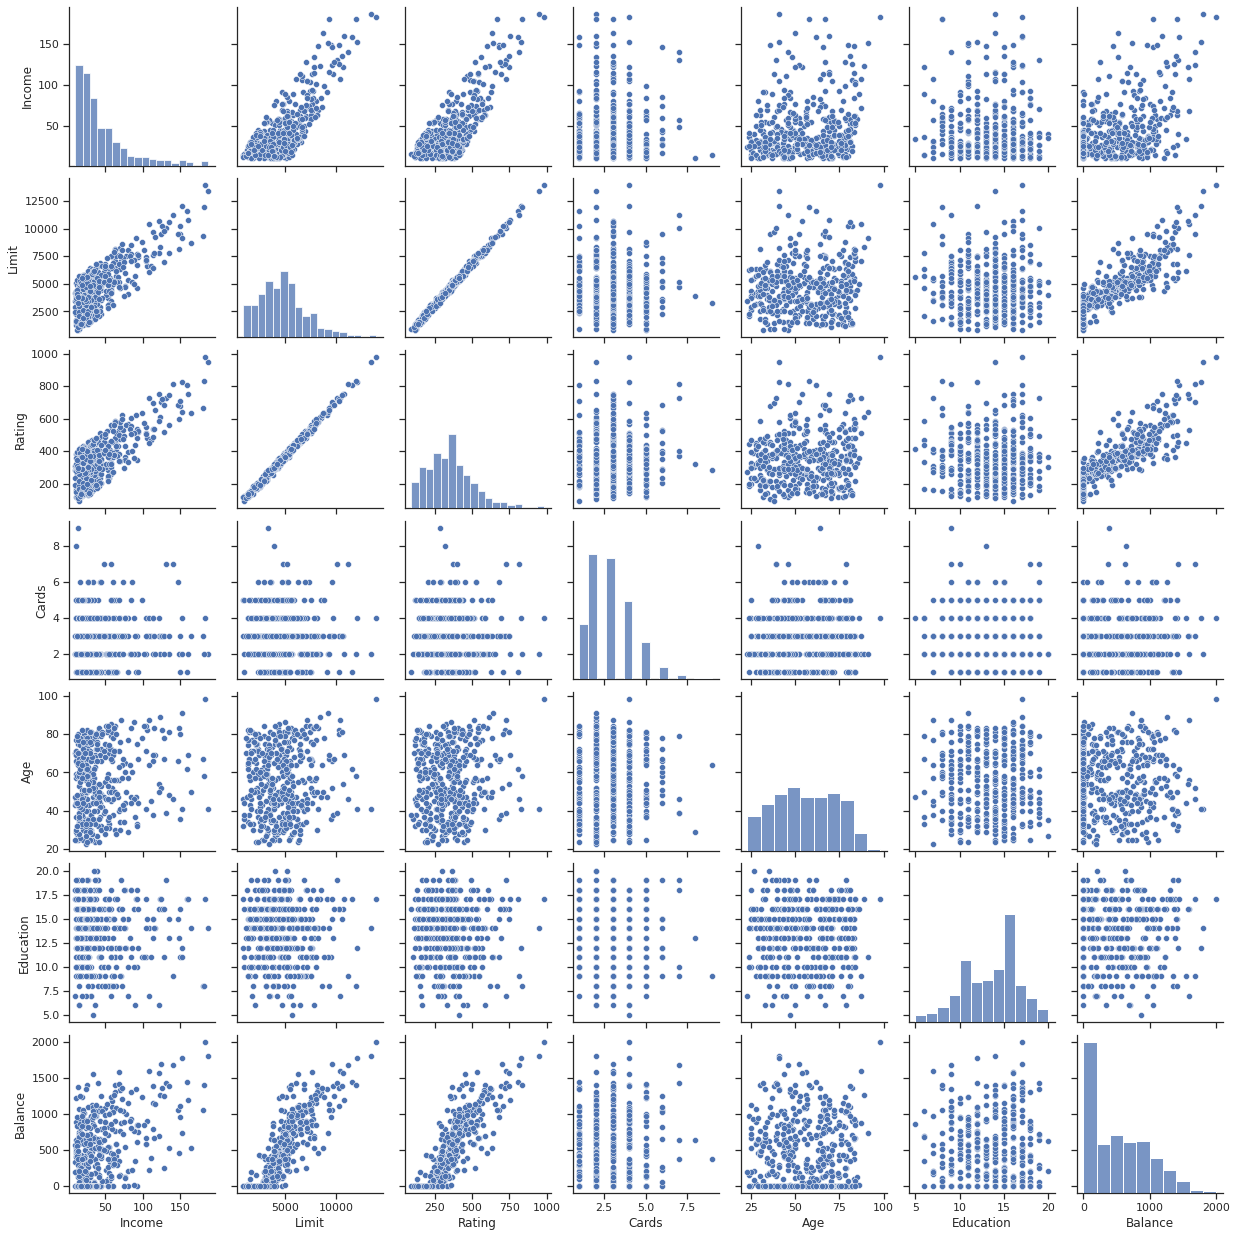

In [172]:
g_ = sns.pairplot(credit)

### 2 - Préparation des données

**Préparer le données afin de pouvoir les utiliser dans nos modèles**

In [173]:
credit['Gender'] = (credit['Gender'] == 'Female').astype(int)
credit['Student'] = (credit['Student'] == 'Yes').astype(int)
credit['Married'] = (credit['Married'] == 'Yes').astype(int)
#credit = credit.drop(columns=['Limit'])

In [174]:
credit.head()

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Balance
1,14.891,3606,283,2,34,11,0,0,1,333
2,106.025,6645,483,3,82,15,1,1,1,903
3,104.593,7075,514,4,71,11,0,0,0,580
4,148.924,9504,681,3,36,11,1,0,0,964
5,55.882,4897,357,2,68,16,0,0,1,331


In [175]:
X = credit.values[:,:-1]
y = credit.values[:,-1]

In [176]:
X.shape

(400, 9)

In [177]:
y.shape

(400,)

In [178]:
import numpy as np
np.set_printoptions(suppress=True)

In [179]:
# Ici ne pas élever les variables indicatrices
X_poly = np.c_[X, X**2, X**3, X**4, X**5, X**6]

In [180]:
from sklearn import preprocessing

In [181]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = StandardScaler()
scaler.fit(X_poly)
X_scale = scaler.transform(X_poly)

In [182]:
X_scale.shape

(400, 54)

### 3 - Séparation des données train / test

[ sklearn.model_selection.train_test_split(*arrays, **options)](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)

**Garder 50% des données pour le test**

In [183]:
from sklearn.model_selection import train_test_split

In [184]:
X_train, X_test, y_train, y_test = train_test_split(X_scale, y, test_size=0.50, random_state=2020)

In [185]:
X_train.shape

(200, 54)

In [186]:
X_test.shape

(200, 54)

### 4 - Régression linéaire

[class sklearn.linear_model.LinearRegression(fit_intercept=True, normalize=False, copy_X=True, n_jobs=None)](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

In [187]:
from sklearn.linear_model import LinearRegression

In [188]:
reg = LinearRegression().fit(X_train, y_train)

In [189]:
coef_reg = reg.coef_
coef_reg

array([   -471.25857872,    -951.98040906,    5728.00052991,
          1845.34317585,    7746.0150232 ,   -3343.38035871,
            -1.17325441,      19.66703543,      -0.72089001,
          2691.46785576,    6062.77397687,  -36119.29744726,
         -9812.32048811,  -45814.81239126,   23591.16393638,
            -1.17325487,      19.66703525,      -0.72088921,
        -12880.74119971,  -14058.99112524,  103749.48787411,
         23399.91828095,  111237.88754078,  -65510.61617805,
            -1.17325488,      19.66703554,      -0.72088916,
         27124.9964058 ,   25927.98333342, -163240.79479458,
        -30172.30606236, -137505.7119519 ,   88943.82439796,
            -1.17325452,      19.66703532,      -0.72088928,
        -26621.79632556,  -29214.21690629,  135576.12510813,
         20491.37240958,   86050.60640889,  -58909.05755075,
            -1.17325488,      19.66703554,      -0.72088922,
          9920.81963908,   13423.86301759,  -46261.52424009,
         -5712.03862014,

In [190]:
from sklearn.metrics import mean_squared_error

In [191]:
y_pred = reg.predict(X_train)
mean_squared_error(y_train, y_pred, squared=False)

58.07584132054926

In [192]:
y_pred = reg.predict(X_test)
mean_squared_error(y_test, y_pred, squared=False)

182.048472976422

### 5 - Régularisation de Tikhonov - Ridge Regression

[class sklearn.linear_model.RidgeCV(alphas=(0.1, 1.0, 10.0), fit_intercept=True, normalize=False, scoring=None, cv=None, gcv_mode=None, store_cv_values=False)](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeCV.html)

In [204]:
from sklearn.linear_model import RidgeCV

In [223]:
ridge = RidgeCV(alphas=[0.01, 0.02, 0.04], cv=5).fit(X_train, y_train)

In [224]:
ridge.alpha_

0.02

In [225]:
coef_ridge = ridge.coef_
coef_ridge

array([-130.80847626,   -7.75252153, -111.43659938,   58.89592524,
       -117.33537368,  -24.67903883,   -0.8883781 ,   19.82040887,
         -0.36615848, -476.31530178, 1005.56079657,  314.27845144,
       -102.24901341,  140.16132879, -117.37165101,   -0.8883781 ,
         19.82040887,   -0.36615848,  172.21822965,  114.38639898,
       -108.88622142,   90.9198035 ,   66.63936734,   77.94730058,
         -0.8883781 ,   19.82040887,   -0.36615848,  258.49189495,
       -436.15994605, -336.43297875,   39.30194496,  -56.17013772,
        198.03146224,   -0.8883781 ,   19.82040887,   -0.36615848,
         24.32858436, -249.52907471,  -81.82703224,  -48.20225913,
        -80.86909121,   95.14292398,   -0.8883781 ,   19.82040887,
         -0.36615848, -205.053178  ,  203.35820656,  356.42388551,
         -7.79954277,   30.03882766, -239.66954019,   -0.8883781 ,
         19.82040887,   -0.36615848])

In [226]:
from sklearn.linear_model import Ridge

In [227]:
modele_final = Ridge(alpha=ridge.alpha_, max_iter=100000).fit(X_train, y_train)

In [228]:
y_pred = modele_final.predict(X_train)
np.sqrt(mean_squared_error(y_train, y_pred))

64.4023313375913

In [229]:
y_pred = modele_final.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

73.87984444320188

### 6 - Lasso

[class sklearn.linear_model.LassoCV(eps=0.001, n_alphas=100, alphas=None, fit_intercept=True, normalize=False, precompute='auto', max_iter=1000, tol=0.0001, copy_X=True, cv=None, verbose=False, n_jobs=None, positive=False, random_state=None, selection='cyclic')](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html)

In [148]:
from sklearn.linear_model import LassoCV

In [149]:
lasso = LassoCV(alphas=[0.3, 0.4, 0.5, 0.6, 0.7, 0.9, 1.1, 1.2], max_iter=1000000, cv=5).fit(X_train, y_train)

In [150]:
lasso.alpha_

1.2

In [151]:
lasso.coef_

array([-226.85386523,  265.29166034,    1.77226771,   -2.2817825 ,
          1.69001538,   -0.        ,  102.8695958 ,   -1.11467505,
       -114.65686304,  456.73259878,    6.64837557,   -0.        ,
          0.        ,   -3.31809948,   16.65438068,   -0.        ,
         -0.        ,    0.        ,    0.        ,   -0.        ,
          0.        ,   -0.        ,    2.22182828,   -1.77153792,
         -0.        ,   -0.        ,   -0.        ,  -10.83257288,
          0.        ,   -0.        ,    0.06181669,   -0.90389663,
         -0.        ,  -55.11859201,   -0.        ,   -0.21919417,
         -0.        ,   -0.1769424 ,    0.        ,   -0.        ,
          0.        ,  -11.83700187,   -3.73122944,   -0.        ,
         -0.76958695,   -0.        ,    0.0758572 ,   -0.14062811])

In [152]:
from sklearn.linear_model import Lasso

In [153]:
modele_final = Lasso(alpha=lasso.alpha_, max_iter=100000).fit(X_train, y_train)

In [154]:
modele_final.coef_

array([-226.85386523,  265.29166034,    1.77226771,   -2.2817825 ,
          1.69001538,   -0.        ,  102.8695958 ,   -1.11467505,
       -114.65686304,  456.73259878,    6.64837557,   -0.        ,
          0.        ,   -3.31809948,   16.65438068,   -0.        ,
         -0.        ,    0.        ,    0.        ,   -0.        ,
          0.        ,   -0.        ,    2.22182828,   -1.77153792,
         -0.        ,   -0.        ,   -0.        ,  -10.83257288,
          0.        ,   -0.        ,    0.06181669,   -0.90389663,
         -0.        ,  -55.11859201,   -0.        ,   -0.21919417,
         -0.        ,   -0.1769424 ,    0.        ,   -0.        ,
          0.        ,  -11.83700187,   -3.73122944,   -0.        ,
         -0.76958695,   -0.        ,    0.0758572 ,   -0.14062811])

In [155]:
y_pred = modele_final.predict(X_train)
np.sqrt(mean_squared_error(y_train, y_pred))

84.9228807980132

In [156]:
y_pred = modele_final.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

80.440103553733

### 7 - ElasticNet

[class sklearn.linear_model.ElasticNetCV(l1_ratio=0.5, eps=0.001, n_alphas=100, alphas=None, fit_intercept=True, normalize=False, precompute='auto', max_iter=1000, tol=0.0001, cv=None, copy_X=True, verbose=0, n_jobs=None, positive=False, random_state=None, selection='cyclic')](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNetCV.html)

In [157]:
from sklearn.linear_model import ElasticNetCV

In [201]:
en = ElasticNetCV(l1_ratio=0.9, alphas=[0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009], max_iter=100000).fit(X_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3686.767676045536, tolerance: 3431.6669943750003
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 18991.356597144157, tolerance: 4101.698392000001
  model = cd_fast.enet_coordinate_descent(


In [202]:
en.alpha_

0.001

In [203]:
en.coef_

array([-131.72239023,   -7.39140504, -110.42381701,   57.03363134,
       -113.52531493,  -27.87550173,   -0.96565386,   19.65988462,
         -0.3571175 , -473.7816478 , 1007.02017479,  309.40036296,
        -96.33668713,  134.92165775, -109.46687236,   -1.05512348,
         19.55545151,   -0.2543453 ,  172.00175899,  109.71802879,
       -101.91743707,   85.75720642,   60.1730817 ,   74.94133263,
         -0.75648796,   19.86367442,   -0.36527855,  257.90657619,
       -435.85162074, -340.18567635,   35.96729691,  -48.97242483,
        196.44122909,   -0.15424596,   20.21197978,   -0.77507694,
         16.43385721, -245.45465371,  -77.05762428,  -40.37216434,
        -71.84188377,   90.41631425,   -1.27417112,   19.8723244 ,
         -0.19873495, -197.51070196,  201.75019045,  352.34827841,
        -11.19722673,   21.63745731, -235.02088684,   -1.1113683 ,
         19.79138695,   -0.25510879])

In [161]:
from sklearn.linear_model import ElasticNet

In [162]:
modele_final = ElasticNet(alpha=en.alpha_, max_iter=100000).fit(X_train, y_train)

In [163]:
y_pred = modele_final.predict(X_train)
np.sqrt(mean_squared_error(y_train, y_pred))

84.02550368540317

In [164]:
y_pred = modele_final.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

79.97899108756972

### 8 - Comparaison avec Ridge et sans Ridge

In [165]:
def polynomial(X, degree=2):
    vec = [np.ones((X.shape[0],1))]
    for d in range(1,degree+1):
        temp = np.array((X**d))
        vec.append(temp)
    return np.hstack(vec)

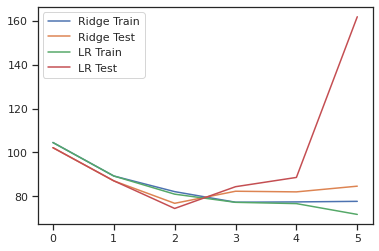

In [166]:
X_poly = np.c_[X, X**2, X**3, X**4, X**5, X**6]

from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = StandardScaler()
scaler.fit(X_poly)
X_scale = scaler.transform(X_poly)

from collections import defaultdict

history = defaultdict(list)

for n in range(1,7):
    X_sub = X_scale[:,0:n*8]
    X_train, X_test, y_train, y_test = train_test_split(X_sub, y, test_size=0.50, random_state=2020)
    reg = LinearRegression().fit(X_train, y_train)
    y_pred = reg.predict(X_train)
    RMSE_train = np.sqrt(mean_squared_error(y_train, y_pred))
    y_pred = reg.predict(X_test)
    RMSE_test = np.sqrt(mean_squared_error(y_test, y_pred))
    history['lr-train'].append(RMSE_train)
    history['lr-test'].append(RMSE_test)
    
    ridge = RidgeCV(alphas=[0.00001, 0.0001, 0.001, 0.003, 0.007, 0.01, 0.05, 0.07], cv=5).fit(X_train, y_train)
    modele_final = Ridge(alpha=ridge.alpha_, max_iter=100000).fit(X_train, y_train)
    y_pred = modele_final.predict(X_train)
    RMSE_train = np.sqrt(mean_squared_error(y_train, y_pred))
    y_pred = modele_final.predict(X_test)
    RMSE_test = np.sqrt(mean_squared_error(y_test, y_pred))
    history['ridge-train'].append(RMSE_train)
    history['ridge-test'].append(RMSE_test)
    
import matplotlib.pyplot as plt
plt.plot(history['ridge-train'], label="Ridge Train")
plt.plot(history['ridge-test'], label="Ridge Test")
plt.plot(history['lr-train'], label="LR Train")
plt.plot(history['lr-test'], label="LR Test")
plt.legend()